# Numerical Methods

## Numerical Linear Algebra III

### Exercise solutions

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import scipy.linalg as sl

### <span style="color:blue">Exercise 1: matrix norms</span>

Write some code to explicitly compute the two matrix norms defined mathematically above and compare against the values found above using in-built scipy functions.

Based on the above code and comments, what is the mathematical definition of the 1-norm and the 2-norm?


In [34]:

def frob(A):
    m, n = A.shape
    squsum = 0.
    for i in range(m):
        for j in range(n):
            squsum += A[i,j]**2
    return np.sqrt(squsum)


def mars(A):
    m, n = A.shape
    maxarsum = 0.
    for i in range(m):
        arsum = np.sum(np.abs(A[i]))
        maxarsum = arsum if arsum > maxarsum else maxarsum
    return maxarsum


A = np.array([[10., 2., 1.],
                 [6., 5., 4.],
                 [1., 4., 7.]])


print(frob(A) == sl.norm(A,'fro') and mars(A) == sl.norm(A,np.inf))


print(np.allclose(frob(A), sl.norm(A,'fro')))
print(np.allclose(mars(A), sl.norm(A,np.inf)))

True
True
True


### <span style="color:blue">Exercise 2: Ill-conditioned matrix</span>

Consider a range of small values for $\epsilon$ and calculate the matrix determinant and condition number.

In [35]:
A = np.array([[2.,1.],
                 [2.,1.]])
b = np.array([3.,0.])
print(sl.det(A), 'singular')

for i in range(3):
    A[1,1] += 0.001
    print(sl.det(A), sl.inv(A) @ b)

0.0 singular
0.0019999999999997797 [ 1501.5 -3000. ]
0.0039999999999995595 [  751.5 -1500. ]
0.005999999999999339 [  501.5 -1000. ]


### <span style="color:blue">Exercise 3: Implement Gauss-Seidel's method.</span>

Generalise the Jacobi code to solve the matrix problem using Gauss-Seidel's method.

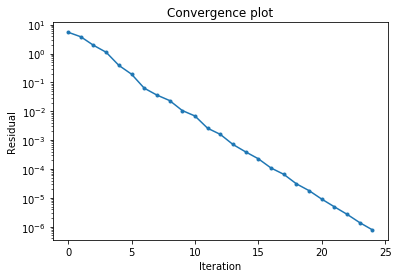

Total number of iterations:  24
[-0.16340811 -0.01532703  0.27335262  0.36893551]
[-0.16340816 -0.01532706  0.27335264  0.36893555]


In [36]:
# this is the code/example from class
A = np.array([[10., 2., 3., 5.],[1., 14., 6., 2.],[-1., 4., 16., -4],[5. ,4. ,3. ,11. ]])
b = np.array([1., 2., 3., 4.])

# an initial guess at the solution - here just a vector of zeros of length the number of rows in A
x = np.zeros(A.shape[0]) 

# specify an iteration tolerance - our stopping criteria
tol = 1.e-6 

# specify an upper limit on the number of iterations - if we don't hit tolerance
# then stop the algorithm, so that it doesn't go on for ever potentially
it_max = 1000 

# for later plotting let's start a list to store the residuals
residuals=[] 

# now iterate
for it in range(it_max):
    x_new = np.zeros(A.shape[0])  # initialise the new solution vector
    for i in range(A.shape[0]):
        x_new[i] = (1./A[i, i]) * (b[i] 
                                   - np.dot(A[i, :i], x[:i]) 
                                   - np.dot(A[i, i + 1:], x[i + 1:]))

    residual = sl.norm(A @ x - b)  # calculate the norm of the residual r=Ax-b for this latest guess
    residuals.append(residual) # store it for later plotting
    if (residual < tol): # if less than our required tolerance jump out of the iteration and end.
        break

    x = x_new # update old solution

# plot the log of the residual against iteration number 
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(111)
ax1.semilogy(residuals, '.-') # plot the log of the residual against iteration number 
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax1.set_title('Convergence plot')
plt.show()

# print out the number of iterations, 
# if this is it_max we know the algorithm didn't actually converge
print('Total number of iterations: ', it)

print(x_new) # our solution vector
print(sl.inv(A) @ b)  # check against scipy

In [37]:
# let's first turn Jacobi into a function

def jacobi(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        x_new = np.zeros(A.shape[0])
        for i in range(m):
            x_new[i] = (1./A[i, i]) * (b[i] 
                                       - np.dot(A[i, :i], x[:i]) 
                                       - np.dot(A[i, i + 1:], x[i + 1:]))
        x = x_new # update old solution 
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break       
    return x, residuals

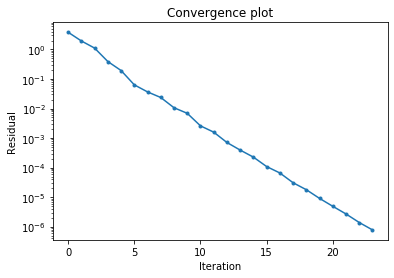

Total number of iterations:  24
[-0.16340811 -0.01532703  0.27335262  0.36893551]
[-0.16340816 -0.01532706  0.27335264  0.36893555]


In [38]:
# test it
x, residuals = jacobi(A, b, maxit=500, tol=1.e-6)

# plot the log of the residual against iteration number 
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(111)
ax1.semilogy(residuals, '.-') # plot the log of the residual against iteration number 
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax1.set_title('Convergence plot')
plt.show()

# print out the number of iterations, 
# if this is it_max we know the algorithm didn't actually converge
print('Total number of iterations: ', it)

print(x_new) # our solution vector
print(sl.inv(A) @ b)  # check against scipy

In [39]:
# now a Gauss-Seidel function

def gauss_seidel(A, b, maxit=500, tol=1.e-6):
    m, n = A.shape
    x = np.zeros(A.shape[0])
    residuals = []
    for k in range(maxit):
        for i in range(m):
            x[i] = (1./A[i, i]) * (b[i] 
                                   - np.dot(A[i,:i], x[:i]) 
                                   - np.dot(A[i,i+1:], x[i+1:])) 
        residual = sl.norm(A@x - b)
        residuals.append(residual)
        if (residual < tol): break
        
    return x, residuals

[-0.16340807 -0.01532701  0.27335259  0.36893548]
[-0.16340812 -0.01532701  0.27335261  0.36893553]


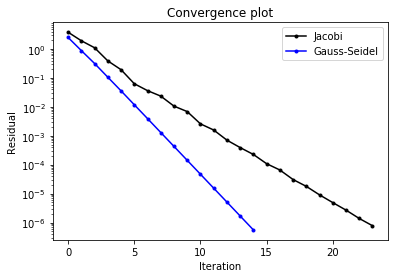

True
True


In [40]:
A = np.array([[10., 2., 3., 5.],
                 [1., 14., 6., 2.],
                 [-1., 4., 16.,-4],
                 [5. ,4. ,3. ,11.]])
b = np.array([1., 2., 3., 4.])
# an initial guess at the solution - here just a vector of zeros of length the number of rows in A
x = np.zeros(A.shape[0]) 

tol = 1.e-6 # iteration tolerance
it_max = 1000 # upper limit on iterations if we don't hit tolerance

x_j, res_j = jacobi(A,b)
x_gs, res_gs = gauss_seidel(A,b)
print(x_j)
print(x_gs)

# plot the log of the residual against iteration number 
fig = plt.figure(figsize=(6, 4))
ax1 = plt.subplot(111)
ax1.semilogy(res_j,'k.-',label='Jacobi') # plot the log of the residual against iteration number 
ax1.semilogy(res_gs,'b.-',label='Gauss-Seidel')
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Residual')
ax1.set_title('Convergence plot')
ax1.legend(loc='best')
plt.show()

# check our solutions agrees with multiplying through by the inverse matrix
# [0] as our implemntations also return the residuals
print(np.allclose(sl.inv(A)@b, jacobi(A, b)[0]))
print(np.allclose(sl.inv(A)@b, gauss_seidel(A, b)[0]))
